In [ ]:
'''This XGBoost_WSM script is designed to take in an observation dataframe and make a prediction for the upcoming summer season
    for select water system components (WSC).
    
    
''''

In [1]:
import XGB_Model
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [310]:
import importlib
importlib.reload(XGB_Model)

<module 'XGB_Model' from 'C:\\Users\\rjohnson18\\Box\\Dissertation\\Paper3\\XGB-WSM\\XGB_Model.py'>

Processing data into features/targets for  Mod_Ave  scenario


prediction time 3 s
Predictions Complete
Calculating historical water system component means to create baseline for comparison with prediction


100% |########################################################################|


Processing predictions and historical means for comparative performance analysis.
Initiating water system component RRV analysis.
Setting up an RRV dataframe and calculating each water system component RRV
Finalizing analysis and placing into Jenks classification categories.
Plotting results for visual analysis:
Using the  45 % &  15 % capacities for Mountain & Little Dell Reservoirs
and the historical daily mean municipal groundwater withdrawal and Deer Creek Reservoir use:
 Green  shading suggests satisfactory conditions.
 Red  shading suggests unsatisfactory conditions.
 
Total volume of Groundwater withdrawal is  14334 acre-feet
Total volume of Deer Creek water requests is  10840 acre-feet


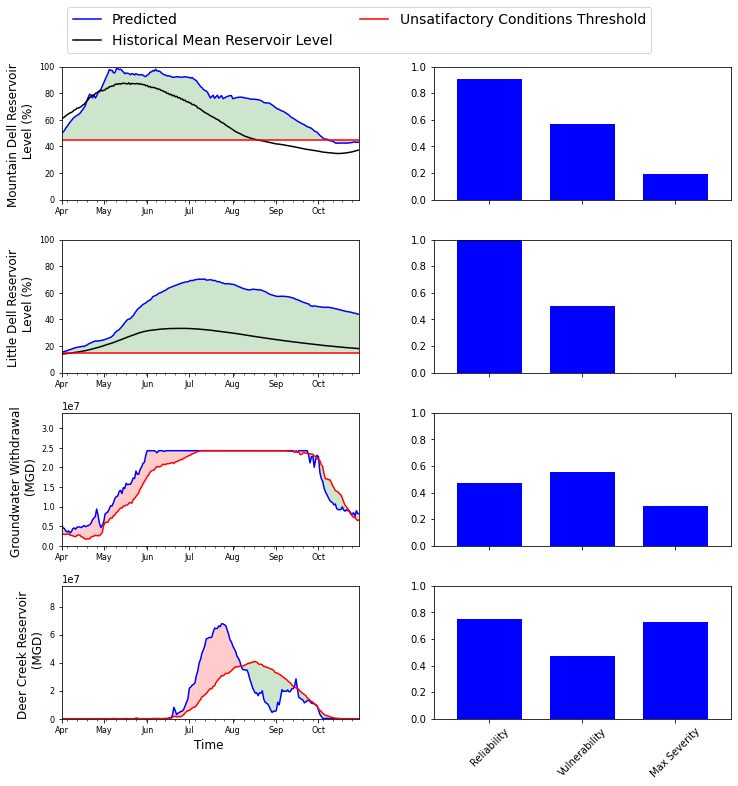

In [313]:
##Load features to make predictions on. The data folder is currently set to GS_Simulations
p = Path('GS_Simulations')
Sims = {i.stem[0:8] : pd.read_excel(i, skiprows = 5) for i in p.glob('**/*.xlsx')}

#Placeholder for CSD-WDM. Should already be in correct OOP structure. Use this to make predictions and replace 
#SLCDPU_Prod_Demands in Sims.
#CSD_WDM()

#Model set up
evalyear = 2021

#set thresholds for each respective reservoir
MDell_Thresh = 45
LDell_Thresh = 15
units = 'MGD'

#Connect to XGB_Model prediction class, future options to select units (MGD vs acre-feet/day)
xgb = XGB_Model.XGB_Prediction(MDell_Thresh, LDell_Thresh, units)

#Process data to have testing features and targets
#Scenario needs to be the xlsx file within Sims and contains all features necessary for a prediction.
#In this example we have 'Mod_Ave, Mod_Dry, Mod_Wet'
scenario = 'Mod_Ave'
xgb.ProcessData(Sims, scenario, evalyear)

#Make WSM predictions
xgb.WSM_Predict()